In [1]:
from util import *
from swarm import *
import random

In [2]:
conciliation_quota  = 1

critical_amount     = 100

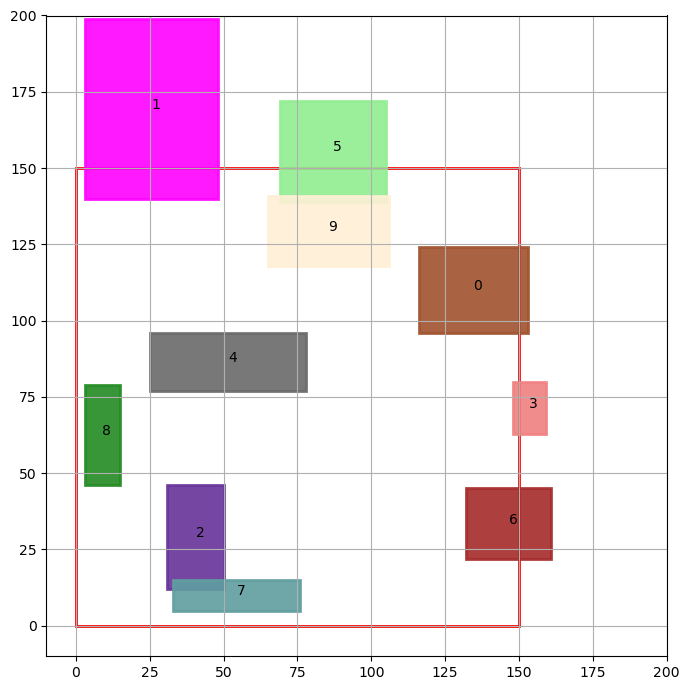

0

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 150,
               "height" : 150}

participants       = generate_unconnected_participants(10, layout_zone, 666)

plot_participants(layout_zone, participants, 200, 200)


In [4]:
initial_participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

In [5]:
participants_after_one_round    = one_round_of_interaction(initial_participants, layout_zone, conciliation_quota, critical_amount)

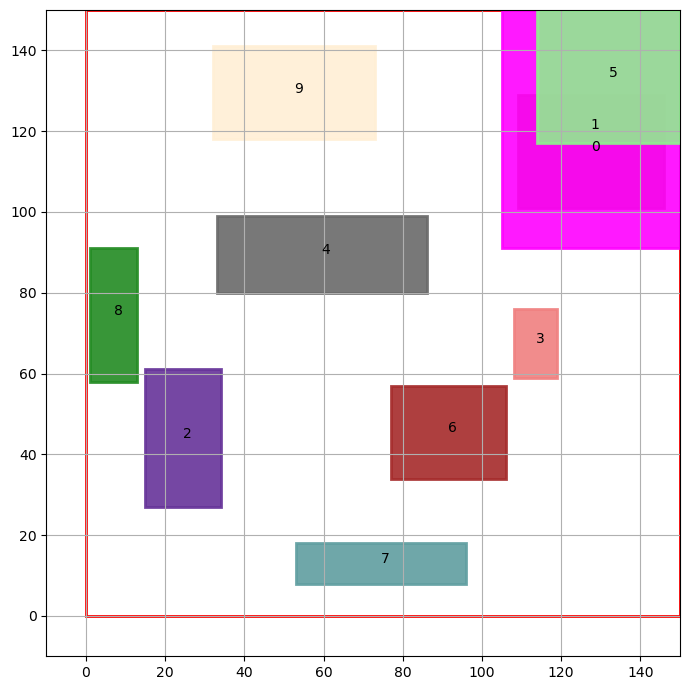

0

In [6]:
plot_participants(layout_zone, participants_after_one_round, 150, 150)


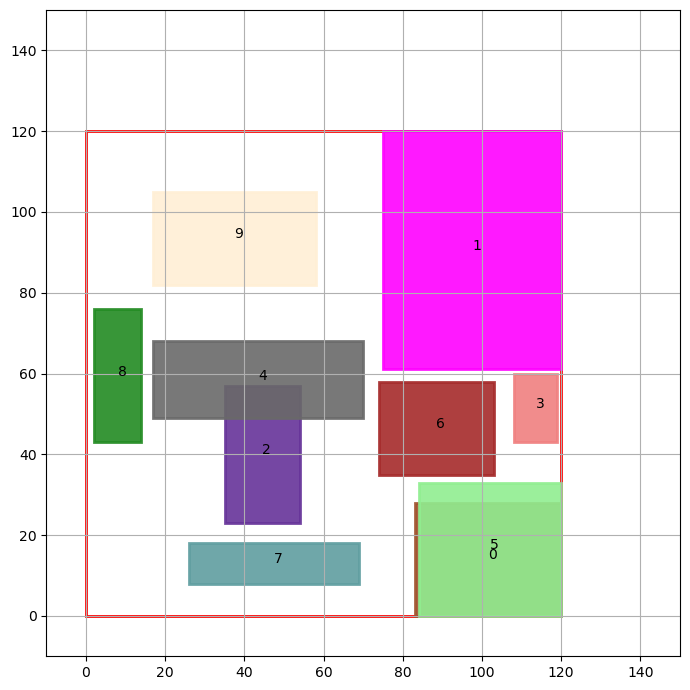

0

In [7]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

participants_after_two_rounds    = one_round_of_interaction(participants_after_one_round, layout_zone, conciliation_quota, critical_amount)

plot_participants(layout_zone, participants_after_two_rounds, 150, 150)

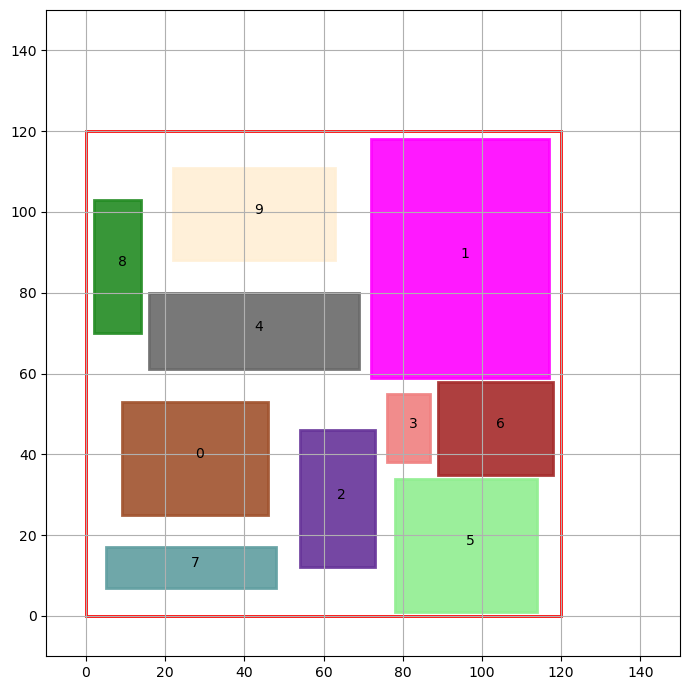

0

In [11]:
participants_after_two_rounds    = one_round_of_interaction(participants_after_two_rounds, layout_zone, conciliation_quota, critical_amount)

plot_participants(layout_zone, participants_after_two_rounds, 150, 150)

In [12]:
last_moves = {key : parti['last-move'] for key, parti in participants_after_two_rounds.items()}

last_moves

{'0': 'center',
 '1': 'center',
 '2': 'center',
 '3': 'center',
 '4': 'center',
 '5': 'center',
 '6': 'center',
 '7': 'center',
 '8': 'center',
 '9': 'center'}